In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#%%
#LIBRARIES
#Custom Library Connection
import sys
import os

#Data Processing
import pandas as pd
import numpy as np
import math

import datetime

#Table Formatter
from google.colab.data_table import DataTable
DataTable.max_columns = 50

#Plots
import matplotlib.pyplot as plt
import matplotlib.dates
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px

In [4]:

#%%
#Reading Data from CSV 
path="/content/gdrive/My Drive/Thesis-Project/data/formatted_whole.csv"
df = pd.read_csv(path)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,21,22,23,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Session ID,User ID,Event Name,Elapsed Time,Nome Componente,Inizio Caricamento,Fine Caricamento,Descrizione Evento,Stack Trace,...,Errore,Path Errore,Custom Field Errore,Status Errore,Messaggio Errore,Exception,date,h,day_name,memory_flag
0,105041,2872635,748994,748994,NaN,NaN,NaN,NaN,Set User ID,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
1,105042,2872636,748994,Home,53.0,Load Agenda from storage,2022-02-01 00:00:24 +0000,2022-02-01 00:00:24 +0000,Load Agenda from storage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
2,105044,2872637,748994,Home,7.0,Load HomePage KPI from storage,2022-02-01 00:00:25 +0000,2022-02-01 00:00:25 +0000,Load HomePage KPI from storage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
3,105045,2872638,748994,Contacts,4.0,Load contacts GDP from storage,2022-02-01 00:00:25 +0000,2022-02-01 00:00:25 +0000,Load contacts GDP from storage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
4,105046,2872639,748994,Home,968.0,Load Tasks from storage,2022-02-01 00:00:24 +0000,2022-02-01 00:00:25 +0000,Load Tasks from storage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474937,1470945,4347572,672590,Home,5668.0,Load Tasks from service,2022-02-28 23:59:35 +0000,2022-02-28 23:59:41 +0000,Load Tasks from service,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-28,23,Monday,-2
1474938,1470943,4347573,672590,exception,NaN,NaN,NaN,NaN,ConsoleLogError,NaN,...,NaN,NaN,NaN,401.0,Http failure response for https://apigateway.g...,NaN,2022-02-28,23,Monday,-2
1474939,1470946,4347574,672590,exception,NaN,NaN,NaN,NaN,ConsoleLogError,NaN,...,NaN,NaN,SafeClockPianoAzioneService-pdaRequest,NaN,NaN,NaN,2022-02-28,23,Monday,-2
1474940,1470948,4347575,672590,exception,NaN,NaN,NaN,NaN,ConsoleLogError,NaN,...,Forbidden,/kpi/detail/5,DashboardDetailService-createLogFn,403.0,No message available,java.lang.reflect.UndeclaredThrowableException,2022-02-28,23,Monday,-2


In [5]:
df['cdf'] = df["Memoria Usata"].rank(method = 'average', pct = True)
df[["cdf", "Memoria Usata"]]

,cdf,Memoria Usata
0,0.339078,56.86
1,0.352319,57.89
2,0.362101,58.55
3,0.435693,63.83
4,0.439843,64.02
...,...,...
1474937,0.142322,41.81
1474938,0.245289,49.27
1474939,0.245487,49.28
1474940,0.245894,49.31


In [6]:
df.loc[df['cdf'] == min(df[df["cdf"]>0.9].cdf)]["Memoria Usata"]


17764      110.81
18104      110.81
18105      110.81
18106      110.81
40156      110.81
            ...  
1413844    110.81
1413845    110.81
1413846    110.81
1413847    110.81
1445700    110.81
Name: Memoria Usata, Length: 72, dtype: float64

In [7]:
df["label"] = [1 if df.iloc[i].cdf>0.9 else 0 for i in range(len(df))]

In [8]:
df = df[["User ID","SO","Tipo Evento","h","day_name" ,"label"]]

In [9]:
df

,User ID,SO,Tipo Evento,h,day_name,label
0,748994,iOS 15.2.1,loginSuccess,0,Tuesday,0
1,748994,iOS 15.2.1,pageLoadTime,0,Tuesday,0
2,748994,iOS 15.2.1,pageLoadTime,0,Tuesday,0
3,748994,iOS 15.2.1,pageLoadTime,0,Tuesday,0
4,748994,iOS 15.2.1,pageLoadTime,0,Tuesday,0
...,...,...,...,...,...,...
1474937,672590,iPadOS 15.1,pageLoadTime,23,Monday,0
1474938,672590,iPadOS 15.1,genericEvent,23,Monday,0
1474939,672590,iPadOS 15.1,genericEvent,23,Monday,0
1474940,672590,iPadOS 15.1,genericEvent,23,Monday,0


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474942 entries, 0 to 1474941
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User ID      1474942 non-null  int64 
 1   SO           1474942 non-null  object
 2   Tipo Evento  1474942 non-null  object
 3   h            1474942 non-null  int64 
 4   day_name     1474942 non-null  object
 5   label        1474942 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 67.5+ MB


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df[["SO","Tipo Evento", "day_name"]]=df[["SO","Tipo Evento", "day_name"]].apply(encoder.fit_transform)


In [13]:
df

,User ID,SO,Tipo Evento,h,day_name,label
0,748994,28,2,0,5,0
1,748994,28,3,0,5,0
2,748994,28,3,0,5,0
3,748994,28,3,0,5,0
4,748994,28,3,0,5,0
...,...,...,...,...,...,...
1474937,672590,33,3,23,1,0
1474938,672590,33,1,23,1,0
1474939,672590,33,1,23,1,0
1474940,672590,33,1,23,1,0


In [14]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
#clf = clf.fit(df[["User ID","SO","Tipo Evento","h","day_name" ]], df.label)
clf = clf.fit(df[["User ID"]], df.label)
tree.plot_tree(clf)

[Text(0.5570652173913043, 0.9444444444444444, 'X[0] <= 19.5\ngini = 0.18\nsamples = 1474942\nvalue = [1327439, 147503]'),
 Text(0.29347826086956524, 0.8333333333333334, 'X[0] <= 18.5\ngini = 0.372\nsamples = 338616\nvalue = [255035, 83581]'),
 Text(0.2717391304347826, 0.7222222222222222, 'X[0] <= 13.5\ngini = 0.041\nsamples = 81312\nvalue = [79594, 1718]'),
 Text(0.17391304347826086, 0.6111111111111112, 'X[0] <= 12.5\ngini = 0.062\nsamples = 31422\nvalue = [30411, 1011]'),
 Text(0.15217391304347827, 0.5, 'X[0] <= 7.5\ngini = 0.053\nsamples = 29712\nvalue = [28904, 808]'),
 Text(0.08695652173913043, 0.3888888888888889, 'X[0] <= 5.5\ngini = 0.016\nsamples = 9479\nvalue = [9403, 76]'),
 Text(0.043478260869565216, 0.2777777777777778, 'X[0] <= 2.5\ngini = 0.004\nsamples = 5769\nvalue = [5758, 11]'),
 Text(0.021739130434782608, 0.16666666666666666, 'gini = 0.0\nsamples = 4202\nvalue = [4202, 0]'),
 Text(0.06521739130434782, 0.16666666666666666, 'X[0] <= 3.5\ngini = 0.014\nsamples = 1567\nval

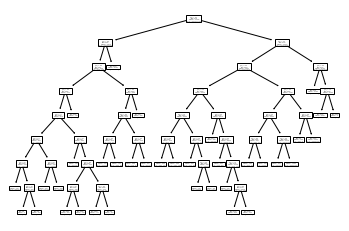

In [16]:
clf = tree.DecisionTreeClassifier()
#clf = clf.fit(df[["User ID","SO","Tipo Evento","h","day_name" ]], df.label)
clf = clf.fit(df[["SO"]], df.label)
tree.plot_tree(clf)

In [ ]:
categorical_cols = ["SO","Tipo Evento", "day_name"]

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

#One-hot-encode the categorical columns.
#Unfortunately outputs an array instead of dataframe.
array_hot_encoded = ohe.fit_transform(df[categorical_cols])

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=df.index)

#Extract only the columns that didnt need to be encoded
data_other_cols = df.drop(columns=categorical_cols)

#Concatenate the two dataframes : 
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [ ]:
data_out

,0,User ID,h,label
0,"(0, 28)\t1.0\n (0, 41)\t1.0\n (0, 49)\t1.0",748994,0,0
1,"(0, 28)\t1.0\n (0, 42)\t1.0\n (0, 49)\t1.0",748994,0,0
2,"(0, 28)\t1.0\n (0, 42)\t1.0\n (0, 49)\t1.0",748994,0,0
3,"(0, 28)\t1.0\n (0, 42)\t1.0\n (0, 49)\t1.0",748994,0,0
4,"(0, 28)\t1.0\n (0, 42)\t1.0\n (0, 49)\t1.0",748994,0,0
...,...,...,...,...
1474937,"(0, 33)\t1.0\n (0, 42)\t1.0\n (0, 45)\t1.0",672590,23,0
1474938,"(0, 33)\t1.0\n (0, 40)\t1.0\n (0, 45)\t1.0",672590,23,0
1474939,"(0, 33)\t1.0\n (0, 40)\t1.0\n (0, 45)\t1.0",672590,23,0
1474940,"(0, 33)\t1.0\n (0, 40)\t1.0\n (0, 45)\t1.0",672590,23,0


In [ ]:
data_out.columns[:-1]

Index([0, 'User ID', 'h'], dtype='object')

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data_out[data_out.columns[:-1]], df.label)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


ValueError: ignored